In [28]:
#allows us to display matplotlib graphs
%matplotlib inline

#lin alg functions
import numpy as np

#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#Example dataset
from sklearn.datasets import fetch_20newsgroups #dataset

# Text frequency Inverse Document Frequency vectorizer 
# (converts text into numerical values of data)
# tfidf vecotrizer helps us determine the weight of words that are in a text
# document
from sklearn.feature_extraction.text import TfidfVectorizer

#Learning model used
from sklearn.naive_bayes import MultinomialNB

#Pipeline is a shortcut that allows us to pump the vectorized data from tfidf
#directly into the MultinomialNB model
from sklearn.pipeline import make_pipeline

#a confusion matrix is used for error testing, it is simply a table that takes
#all the actual results and compares them in a table on how the training set
#did compared to a test set. (before deployment of algorithm)
from sklearn.metrics import confusion_matrix

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [12]:
#Defining all categories
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [14]:
#sorting data for training
train = fetch_20newsgroups(subset='train', categories=categories)
#sorting data for testing
test = fetch_20newsgroups(subset='test', categories=categories)

In [16]:
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [26]:
categories[train.target[5]]

'talk.politics.guns'

In [18]:
print(len(train.data))

11314


In [34]:
#Creating a prediction model using Multinomial Naive Bayes
#prediction model is simply just a pipeline of a tfidf vectorizer and a 
#multinomial Naive Bayes model.
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Training the model with the data
# since the model we are working with isn't the multinomialNB class but is a
# pipeline, the data that is used, can be the articles directly, and the 
# TfidfVectorizer transforms our data for us.
# train.data, is all the parameters for predictions while train.target is the 
# result that was assigned to that train data or the actual classification
model.fit(train.data, train.target)


#creating labels for the test data
labels = model.predict(test.data)

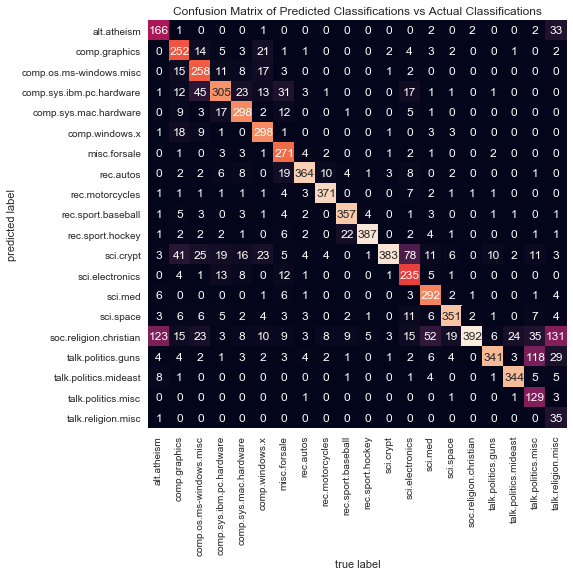

In [54]:
#creating confusion matrix and heatmap
#instancing the class with the actual values vs predicted values
cm = confusion_matrix(test.target, labels)

#creating a foundation for us to put the heatmap on for a good size
fig, ax = plt.subplots(figsize=(7.5,7.5))

'''
creating a heatmap to show exactly how the results were
cm.T is the transpose of the numpy array of cm. We transpose the data so that
we can have all the predicted values be on the y axis and the actual values
to be on the x - axis, another way to have done this was simply switch the two
parameters when instancing the confusion matrix
square determines the shape of the graph
annot is short for annotations which are the numbers in the boxes
fmt stands for formmating, since the values are numerical, one needs to specify
to what kind of precision the annotations should be, in this case we use 'd'
which is integer, other examples are 'f' for float or .2f for two decimal places
xticklabels and yticklabels are simply the names of each classification
'''
sns.heatmap(cm.T, square=False, annot=True, cbar=False, fmt='d', 
            xticklabels=train.target_names, yticklabels=train.target_names)

#creating titles for the axis
plt.title('Confusion Matrix of Predicted Classifications vs Actual Classifications')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [61]:
'''
how to deploy our model by creating a function
predict_category: takes in s as a string and makes a prediction 
                  with the training data that is passed in and the
                  pipline model of tfidfvectorizer and the multinomialNB model
returns the category of the text document 
'''
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [68]:
predict_category('Health, Cancer')

'sci.med'

In [71]:
predict_category('homerun')

'rec.sport.baseball'